In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras import *
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_s_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
# fix random seed for reproducibility
np.random.seed(7)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)


In [3]:
# load pima indians dataset
dataset = pd.read_csv("/Users/malush/Documents/projet AFD 2018/AFD/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]


X, X_test, Y, Y_test = train_test_split(X, Y)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)


In [4]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

print(y_encode_binaire)

[2 2 0 ... 1 0 0]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


(20482, 58)
(20482, 58)
(20482,)
(20482,)


0.11506216296026067

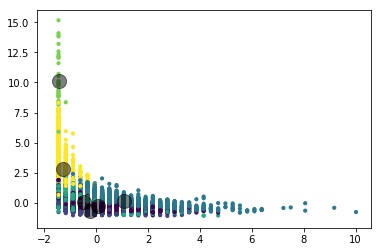

In [6]:
print(X.shape)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(X.shape)
plt.scatter(X[:, 0], X[:, 5], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 5], c='black', s=200, alpha=0.5);

print(kmeans.labels_.shape)
print(Y_numerique.shape)

metrics.adjusted_rand_score(kmeans.labels_, Y_numerique)
